<a href="https://colab.research.google.com/github/brendaFlavia/DataVisualization/blob/main/TextAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
#import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
import nltk
import spacy
import pathlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from gensim.parsing.preprocessing import STOPWORDS



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#train and Validation data directory 
data_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/Comments.xlsx') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#read excel data using pandas
comment_data = pd.read_excel(data_dir)

In [ ]:
import nltk
nltk.download('stopwords')
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#cleaning the text 
def tokeniz(sentences):
   for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
processed_data = list(tokeniz(comment_data['Comment']))

In [ ]:
print(processed_data)

[['djfjkdfjkjkffdk', 'edited'], ['faith', 'has', 'exhibited', 'enthusiasm', 'in', 'taking', 'on', 'the', 'project', 'at', 'hand', 'she', 'has', 'already', 'shown', 'promising', 'signs', 'in', 'understanding', 'the', 'core', 'concepts', 'of', 'software', 'engineering', 'look', 'forward', 'discovering', 'more', 'as', 'time', 'goes', 'on'], ['he', 'now', 'has', 'now', 'understood', 'the', 'structure', 'of', 'grails', 'and', 'how', 'different', 'components', 'relate', 'understands', 'the', 'process', 'of', 'getting', 'api', 'from', 'mtn'], ['the', 'intern', 'was', 'oriented', 'on', 'ict', 'setup', 'and', 'infrastructure', 'of', 'soroti', 'university', 'drafted', 'workplan', 'and', 'started', 'off', 'the', 'internship', 'simon', 'was', 'encouraged', 'to', 'take', 'the', 'internship', 'seriously', 'as', 'there', 'was', 'lot', 'to', 'learn'], ['the', 'student', 'was', 'oriented', 'on', 'the', 'organization', 'structure', 'developed', 'workplan', 'for', 'the', 'week', 'internship', 'and', 'par

In [ ]:
#Building Bigram & Trigram Models
bigram = gensim.models.Phrases(processed_data, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[processed_data], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#importing the Stopwords to use them
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','for'])

In [ ]:
#function to filter out stopwords
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:

#function to create bigrams
def create_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]

In [ ]:
#function to create trigrams
def create_trigrams(texts):
   [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
#function for lemmatization
def lemmatize(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
   texts_op = []
   for sent in texts:
      doc = nlp(" ".join(sent))
      texts_op.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_op

Bigram a two-word sequence of words, tigram a three-word sequence of words in a corpus

In [ ]:
#removing stopwords, creating bigrams and lemmatizing the text
data_wo_stopwords = remove_stopwords(processed_data)
data_bigrams = create_bigrams(data_wo_stopwords)
data_lemmatized = lemmatize(data_bigrams, allowed_postags=[ 'NOUN', 'ADJ', 'VERB','ADV'])

In [ ]:
#printing the lemmatized data
print(data_lemmatized[:3])

[['edit'], ['faith', 'exhibit', 'enthusiasm', 'take', 'project', 'hand', 'show', 'promising', 'sign', 'understand', 'core', 'concept', 'software_engineere', 'look_forward', 'discover', 'time', 'go'], ['understand', 'structure', 'grail', 'different', 'component', 'relate', 'understand', 'process', 'get', 'api', 'mtn']]


In [ ]:
comment_data['Comment']=comment_data['Comment'].astype(str)

display bigram/tigram 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(comment_data['Comment'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram

,frequency,bigram/trigram
0,208,successfully completed
1,194,end internship
2,185,week tasks
3,185,completed week
4,149,successfully completed week
...,...,...
52821,1,10 dhcp client
52822,1,10 dhcp
52823,1,04 server
52824,1,000 alphanumeric codes


In [ ]:
#creating a dictionary
gensim_dictionary = corpora.Dictionary(data_lemmatized)

In [ ]:
texts = data_lemmatized

In [ ]:
#building a corpus for the topic model
gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]

In [ ]:
#printing the corpus we created above.
print(gensim_corpus[:5]) 

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(15, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(26, 1), (31, 1), (34, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


In [ ]:
#we can print the words with their frequencies.
[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:100]] 

[[('edit', 1)],
 [('concept', 1),
  ('core', 1),
  ('discover', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('faith', 1),
  ('go', 1),
  ('hand', 1),
  ('look_forward', 1),
  ('project', 1),
  ('promising', 1),
  ('show', 1),
  ('sign', 1),
  ('software_engineere', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('understand', 2),
  ('api', 1),
  ('component', 1),
  ('different', 1),
  ('get', 1),
  ('grail', 1),
  ('mtn', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1)],
 [('take', 1),
  ('draft', 1),
  ('encourage', 1),
  ('ict', 1),
  ('infrastructure', 1),
  ('internship', 2),
  ('learn', 1),
  ('lot', 1),
  ('orient', 1),
  ('setup', 1),
  ('start', 1),
  ('workplan', 1)],
 [('structure', 1),
  ('internship', 1),
  ('orient', 1),
  ('workplan', 1),
  ('acquire', 1),
  ('assessment', 1),
  ('develop', 1),
  ('organization', 1),
  ('participate', 1),
  ('printer', 1),
  ('servicing', 1),
  ('skill', 1),
  ('student', 1),
  ('teamwork', 1),
  ('technical', 1),
  

Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpora. It is also a topic model that is used for discovering abstract topics from a collection of documents.

In [ ]:

lda_model = gensim.models.LdaMulticore(gensim_corpus, # Stream of document vectors or sparse matrix of shape 
                                       num_topics=5, # The number of requested latent topics to be extracted from the training corpus.
                                       id2word = gensim_dictionary, #Mapping from word IDs to words. It is used to determine the vocabulary size. 
                                       passes = 50, #Number of passes through the corpus during training.
                                       workers=10) #Number of workers processes to be used for parallelization.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
## check the bow_corpus
bow_doc_100 = gensim_corpus[3]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     gensim_dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 15 ("take") appears 1 time.
Word 27 ("draft") appears 1 time.
Word 28 ("encourage") appears 1 time.
Word 29 ("ict") appears 1 time.
Word 30 ("infrastructure") appears 1 time.
Word 31 ("internship") appears 2 time.
Word 32 ("learn") appears 1 time.
Word 33 ("lot") appears 1 time.
Word 34 ("orient") appears 1 time.
Word 35 ("setup") appears 1 time.
Word 36 ("start") appears 1 time.
Word 37 ("workplan") appears 1 time.


In [ ]:
# Human readable format of corpus (term-frequency)
[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:3]]

[[('edit', 1)],
 [('concept', 1),
  ('core', 1),
  ('discover', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('faith', 1),
  ('go', 1),
  ('hand', 1),
  ('look_forward', 1),
  ('project', 1),
  ('promising', 1),
  ('show', 1),
  ('sign', 1),
  ('software_engineere', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('understand', 2),
  ('api', 1),
  ('component', 1),
  ('different', 1),
  ('get', 1),
  ('grail', 1),
  ('mtn', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1)]]

In [ ]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.046*"internship" + 0.044*"week" + 0.036*"complete" + 0.033*"task" + 0.028*"skill" + 0.026*"manage" + 0.022*"acquire" + 0.022*"server" + 0.021*"set" + 0.020*"challenge"


Topic: 1 
Words: 0.048*"good" + 0.044*"work" + 0.018*"time" + 0.017*"team" + 0.014*"student" + 0.013*"use" + 0.013*"website" + 0.012*"system" + 0.011*"learn" + 0.011*"project"


Topic: 2 
Words: 0.046*"task" + 0.045*"challenge" + 0.041*"code" + 0.034*"complete" + 0.026*"week" + 0.025*"encourage" + 0.020*"internship" + 0.017*"app" + 0.012*"good" + 0.012*"end"


Topic: 3 
Words: 0.035*"progressive" + 0.024*"network" + 0.018*"encourage" + 0.014*"practice" + 0.014*"computer" + 0.013*"use" + 0.013*"device" + 0.013*"need" + 0.011*"perfect" + 0.011*"pc"


Topic: 4 
Words: 0.027*"work" + 0.018*"progress" + 0.016*"learn" + 0.015*"great" + 0.014*"system" + 0.013*"week" + 0.013*"task" + 0.012*"design" + 0.012*"team" + 0.011*"good"




In [ ]:
documents_lda_topics = pd.DataFrame(columns = ["Excellent", "Good", "Neutral", "Poor", "Very Poor"])
for i in range(len(gensim_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(gensim_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050


In [ ]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)

In [ ]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(5)

LDA + bow_corpus: topic probability:


,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,0.100008,0.599965,0.100008,0.100010,0.100009,Good
1,0.011163,0.381165,0.105575,0.490675,0.011422,Poor
2,0.427498,0.521504,0.016820,0.017002,0.017175,Good
3,0.362455,0.014641,0.014638,0.246428,0.361838,Excellent
4,0.644435,0.154591,0.011261,0.011373,0.178340,Excellent


In [ ]:
result_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/results2.csv') 
final_output = texts.join(documents_lda_topics)
final_output.to_csv(result_dir)
final_output

In [ ]:

#calculating and displaying the coherence score
coherence_model_lda = CoherenceModel(
   model=lda_model, texts=data_lemmatized, dictionary=gensim_dictionary, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3727530636274149


In [ ]:
def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab20',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()


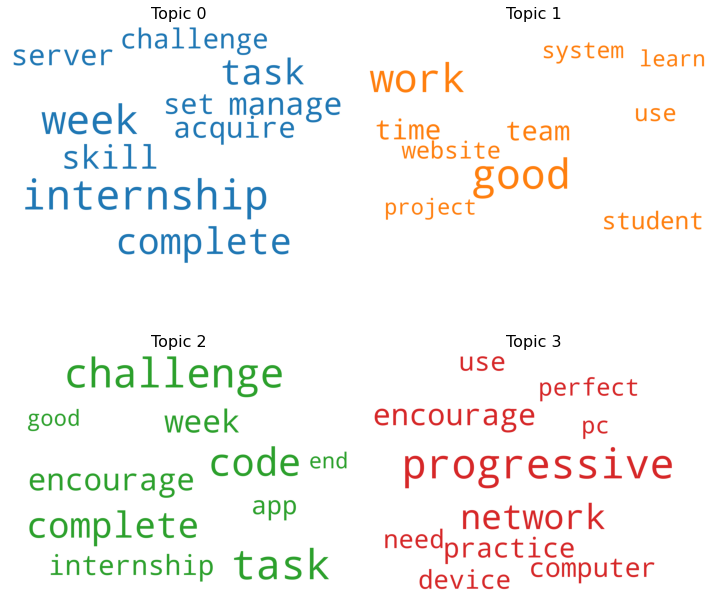

In [ ]:
get_wordcloud(topic= lda_model)

The bar chart by default shows the 30 most salient terms. The bars indicate the total frequency of the term across the entire corpus. Salient is a specific metric, defined at the bottom of the visualization, that can be thought of as a metric used to identify most informative or useful words for identifying topics in the entire collection of texts. Higher saliency values indicate that a word is more useful for identifying a specific topic. 

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, gensim_dictionary)
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.133502 -0.013627       1        1  26.578093
1      0.187548 -0.007475       2        1  22.796338
2     -0.059884 -0.183433       3        1  18.199115
0     -0.207646 -0.020653       4        1  17.977210
3     -0.053520  0.225187       5        1  14.449244, topic_info=           Term        Freq       Total Category  logprob  loglift
130        work  684.000000  684.000000  Default  30.0000  30.0000
142        code  306.000000  306.000000  Default  29.0000  29.0000
31   internship  516.000000  516.000000  Default  28.0000  28.0000
210   challenge  503.000000  503.000000  Default  27.0000  27.0000
52     complete  546.000000  546.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
872     machine   31.558693   59.655873   Topic5  -5.1847   1.2978
45        skill   48.180496  376.417440   Topic5  -4.7616  -0.1212
161         new   37.721995  256.110830   Topic5  -5.0063   0.0192
8          hand   33.070567  127.122444   Topic5  -5.1379   0.5880
46      student   31.758635  267.284755   Topic5  -5.1784  -0.1956

[345 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
1857      5  0.890626                  abit
60        1  0.144087                  able
60        2  0.389035                  able
60        3  0.043226                  able
60        4  0.153693                  able
...     ...       ...                   ...
171       2  0.564766  working_relationship
171       3  0.434435  working_relationship
1021      2  0.074199                 write
1021      4  0.856663                 write
1021      5  0.067454                 write

[537 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

In [ ]:
nlp = spacy.load("en_core_web_sm")  #creating an object and loading the pre-trained model for "English"

Create NER model

In [ ]:
#sentence = "Microsoft is looking at buying Uganda startup for £1 million"
sentence = "Brenda is going to London to see the Queen of England"

  
doc = nlp(sentence)
  
for ent in doc.ents:
  print(ent.text,"|", ent.label_)

Brenda | PERSON
London | GPE
the Queen of England | WORK_OF_ART
